In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [8]:
# Load the dataset
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3313,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
3314,2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
3315,2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400
3316,2023-08-31,255.979996,261.179993,255.050003,258.079987,258.079987,108861700


C:\Users\Himasagar\AppData\Local\Temp\ipykernel_5152\3628927892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\Himasagar\AppData\Local\Temp\ipykernel_5152\3628927892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


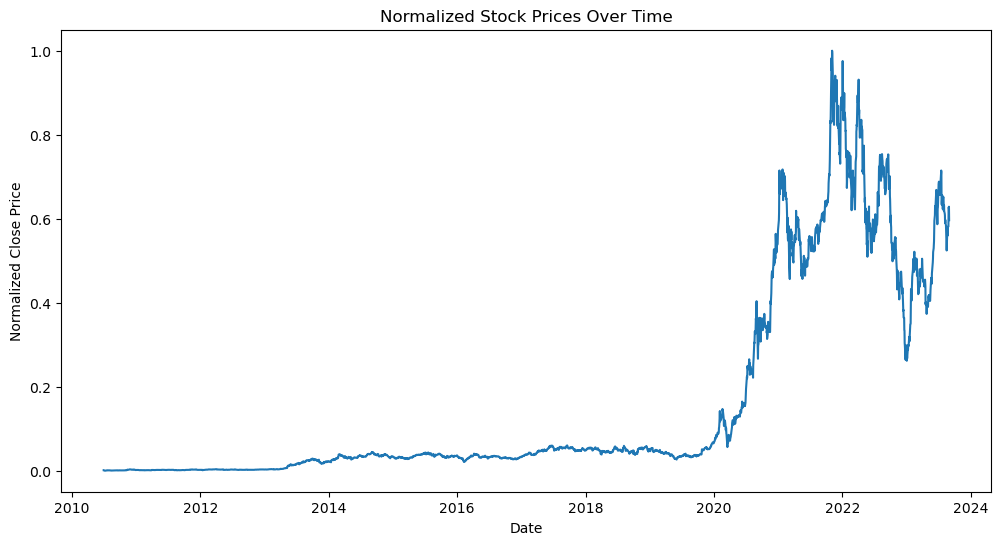

In [19]:
# Remove unnecessary columns
df = df[['Date', 'Close']]

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Sort the data by date (if it's not already sorted)
df.sort_index(ascending=True, inplace=True)

# Normalize the data (scaling to values between 0 and 1)
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Visualize the data
plt.figure(figsize=(12, 6))
plt.title('Normalized Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.plot(df.index, df['Close'])
plt.show()


In [6]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [12]:
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i:i+sequence_length]
        sequences.append(x)
        target.append(y)
    
    return np.array(sequences), np.array(target)

sequence_length = 10  # Adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [13]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [15]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
model.fit(X_train, y_train, batch_size=64, epochs=50)


Epoch 1/50
87/87 [==============================] - 6s 11ms/step - loss: nan
Epoch 2/50
87/87 [==============================] - 1s 10ms/step - loss: nan
Epoch 3/50
87/87 [==============================] - 1s 9ms/step - loss: nan
Epoch 4/50
87/87 [==============================] - 1s 10ms/step - loss: nan
Epoch 5/50
87/87 [==============================] - 1s 11ms/step - loss: nan
Epoch 6/50
87/87 [==============================] - 1s 11ms/step - loss: nan
Epoch 7/50
87/87 [==============================] - 1s 11ms/step - loss: nan
Epoch 8/50
87/87 [==============================] - 1s 10ms/step - loss: nan
Epoch 9/50
87/87 [==============================] - 1s 10ms/step - loss: nan
Epoch 10/50
87/87 [==============================] - 1s 12ms/step - loss: nan
Epoch 11/50
87/87 [==============================] - 1s 12ms/step - loss: nan
Epoch 12/50
87/87 [==============================] - 1s 9ms/step - loss: nan
Epoch 13/50
87/87 [==============================] - 1s 13ms/step - loss: n

In [17]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')


Test Loss: nan


In [18]:
y_pred = model.predict(X_test)


44/44 [==============================] - 1s 3ms/step


In [23]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 3ms/step


In [24]:
y_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

ValueError: x and y must have same first dimension, but have shapes (654,) and (1385, 1)

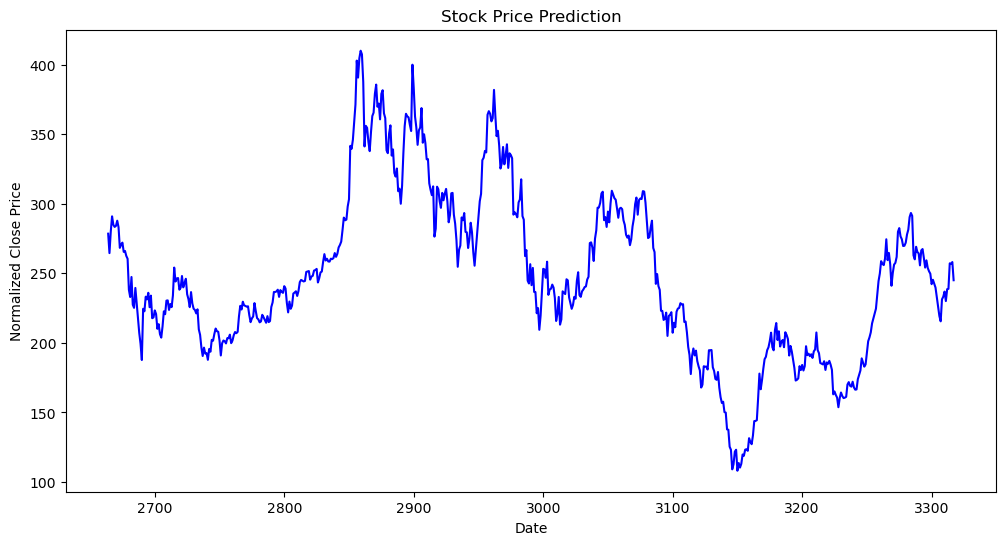

In [25]:
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')

# Plot the actual stock prices
plt.plot(test_data.index[sequence_length:], test_data['Close'][sequence_length:], label='Actual', color='blue')

# Plot the predicted stock prices
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted', color='orange')

plt.legend()
plt.show()